# 6.5: Unsupervised Machine Learning: Clustering

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler


In [57]:
%matplotlib inline

In [59]:
# define path
path = '/Users/LuisD/Documents/CareerFoundry/Achievement 6/AIR BNB Analysis'

In [61]:
#import
listings = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_complete_6_4.csv'), index_col = False)

In [63]:
listings.shape

(20030, 16)

In [65]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20030 non-null  int64  
 1   id                 20030 non-null  int64  
 2   name               20030 non-null  object 
 3   neighbourhood      20030 non-null  object 
 4   room_type          20030 non-null  object 
 5   price              20030 non-null  int64  
 6   number_of_reviews  20030 non-null  int64  
 7   reviews_per_month  20030 non-null  float64
 8   availability_365   20030 non-null  int64  
 9   host_is_superhost  20030 non-null  object 
 10  property_type      20030 non-null  object 
 11  bedrooms           20030 non-null  int64  
 12  security_deposit   20030 non-null  float64
 13  cleaning_fee       20030 non-null  float64
 14  Price category     20030 non-null  object 
 15  log_price          20030 non-null  float64
dtypes: float64(4), int64(6

In [67]:
# Drop column
listings = listings.drop(columns=['Unnamed: 0'])

In [69]:
listings.head()


,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee,Price category,log_price
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.10,44,t,Apartment,1,100.0,50.0,Low price,4.094345
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2,300.0,40.0,Low price,5.081404
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1,0.0,0.0,Low price,4.394449
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1,300.0,40.0,Low price,4.836282
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1,0.0,0.0,Low price,5.017280


In [71]:
# Select relevant numeric columns for clustering
columns = ['price', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'bedrooms', 'security_deposit', 'cleaning_fee']
data = listings[columns]

In [73]:
# Handle missing values (if any)
data = data.fillna(data.mean())

In [75]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [78]:
# Determine the optimal number of clusters using the elbow method
inertia = []  # To store the inertia values for each k

In [80]:
# Test different values of k 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

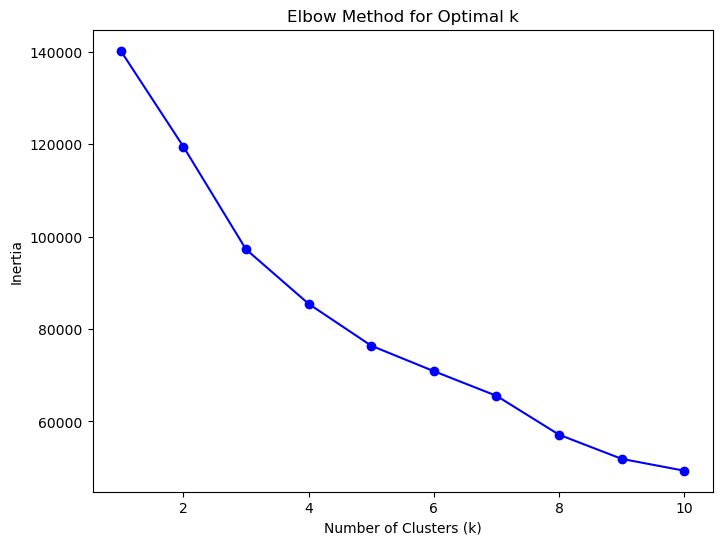

In [82]:
# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

The optimal number of cluster is 3, because the within-cluster sume of square from 3 to 4 slow down sigficantly. 

In [85]:
# Fit K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataset
listings['cluster'] = kmeans.labels_

# View the cluster centers
cluster_centers = kmeans.cluster_centers_

# Inverse transform the centers back to original scale
cluster_centers_original_scale = scaler.inverse_transform(cluster_centers)

# Print the cluster centers in the original scale
print("Cluster Centers (in original scale):")
print(pd.DataFrame(cluster_centers_original_scale, columns=columns))

Cluster Centers (in original scale):
        price  number_of_reviews  reviews_per_month  availability_365  \
0  125.103972          12.996021           0.657026         42.794443   
1  246.425172          12.895798           0.617397         76.293954   
2  109.902913         124.331392           4.373987        163.607767   

   bedrooms  security_deposit  cleaning_fee  
0  1.126908         97.474351     24.637508  
1  2.524657        342.623714     57.946827  
2  1.024595         84.720388     21.562460  


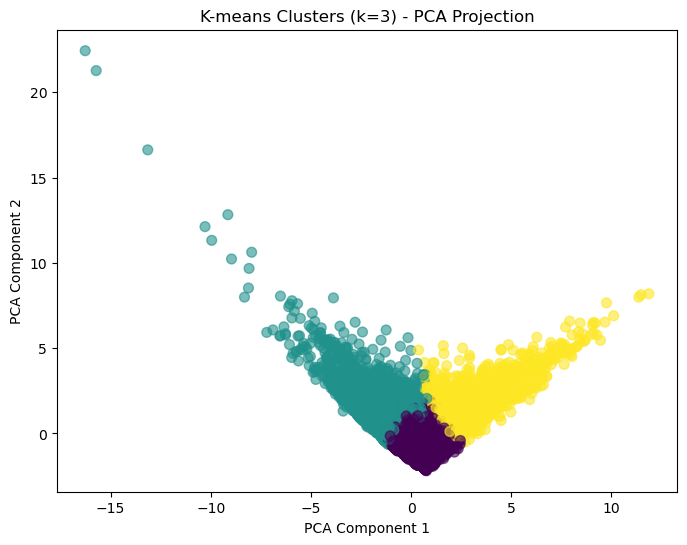

In [87]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.6)
plt.title('K-means Clusters (k=3) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [89]:
listings.head()

,id,name,neighbourhood,room_type,price,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,property_type,bedrooms,security_deposit,cleaning_fee,Price category,log_price,cluster
0,2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,Private room,59,248,2.10,44,t,Apartment,1,100.0,50.0,Low price,4.094345,2
1,3209,"Quiet apt near center, great view",Westerpark,Entire home/apt,160,42,1.03,47,f,Apartment,2,300.0,40.0,Low price,5.081404,1
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,Entire home/apt,80,233,2.18,198,f,Townhouse,1,0.0,0.0,Low price,4.394449,2
3,25428,Lovely apt in City Centre (Jordaan),Centrum-West,Entire home/apt,125,1,0.09,141,f,Apartment,1,300.0,40.0,Low price,4.836282,0
4,27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,Private room,150,171,2.03,199,t,Houseboat,1,0.0,0.0,Low price,5.017280,2


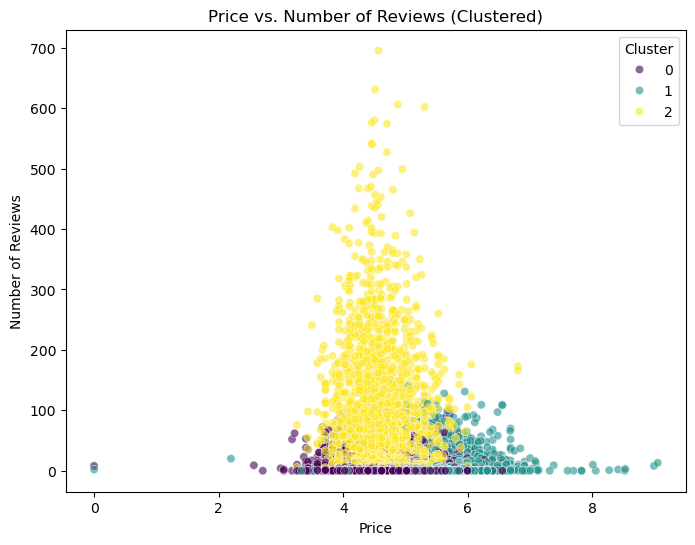

In [95]:
# Scatterplot of Price vs. Number of Reviews

plt.figure(figsize=(8,6))
sns.scatterplot(x=listings['price'], y=listings['number_of_reviews'], hue=listings['cluster'], palette='viridis', alpha=0.6)
plt.title('Price vs. Number of Reviews (Clustered)')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.legend(title="Cluster")
plt.show()

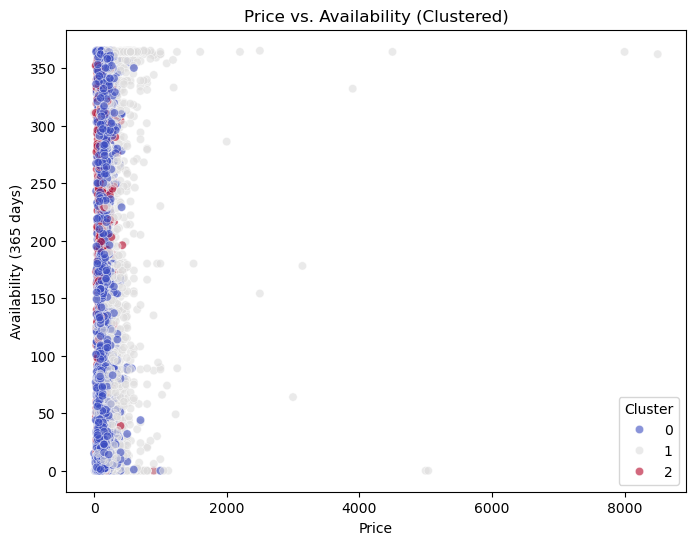

In [99]:
# Scatterplot of Price vs. Availability (365 days)
plt.figure(figsize=(8,6))
sns.scatterplot(x=listings['price'], y=listings['availability_365'], hue=listings['cluster'], palette='coolwarm', alpha=0.6)
plt.title('Price vs. Availability (Clustered)')
plt.xlabel('Price')
plt.ylabel('Availability (365 days)')
plt.legend(title="Cluster")
plt.show()

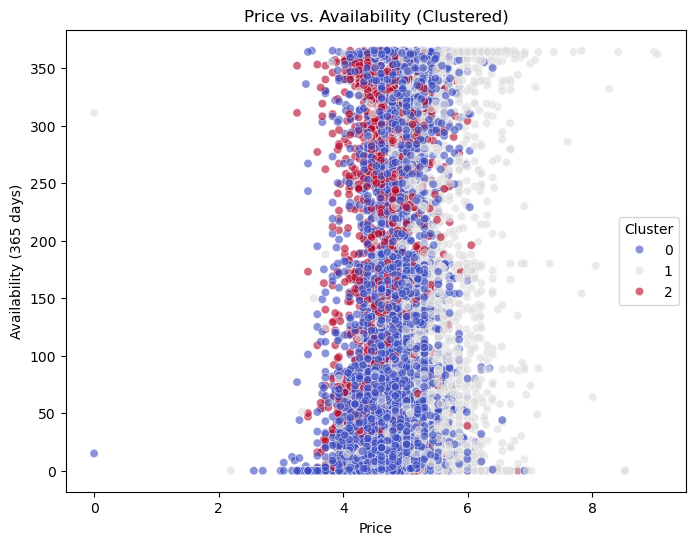

In [101]:
# Scatterplot of log_Price vs. Availability (365 days)
plt.figure(figsize=(8,6))
sns.scatterplot(x=listings['log_price'], y=listings['availability_365'], hue=listings['cluster'], palette='coolwarm', alpha=0.6)
plt.title('Price vs. Availability (Clustered)')
plt.xlabel('Price')
plt.ylabel('Availability (365 days)')
plt.legend(title="Cluster")
plt.show()

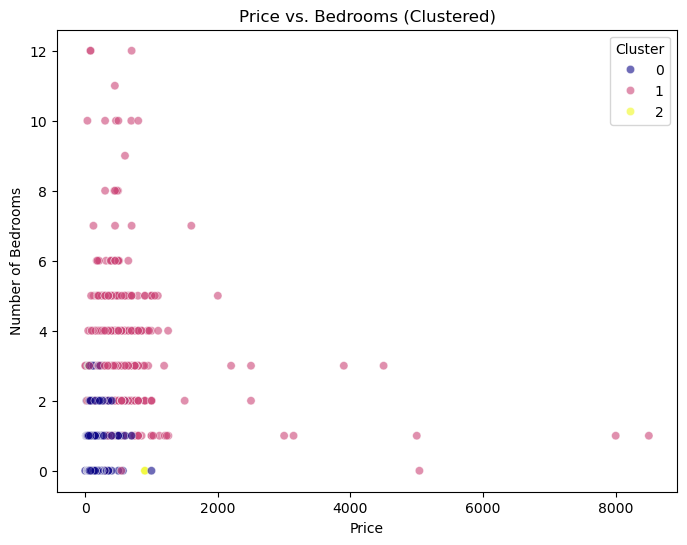

In [106]:
# Scatterplot of Price vs. Bedrooms
plt.figure(figsize=(8,6))
sns.scatterplot(x=listings['price'], y=listings['bedrooms'], hue=listings['cluster'], palette='plasma', alpha=0.6)
plt.title('Price vs. Bedrooms (Clustered)')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.legend(title="Cluster")
plt.show()

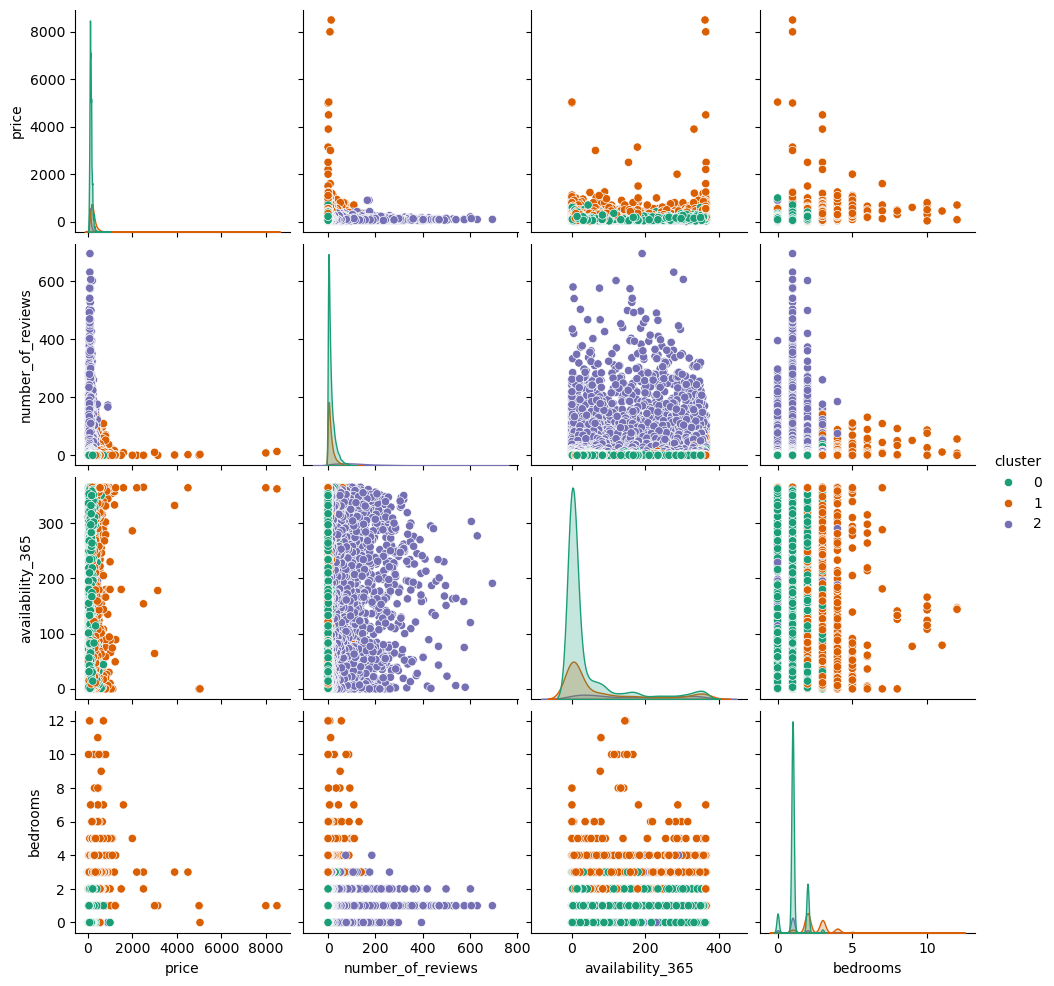

In [108]:
# Pairplot of Selected Features
sns.pairplot(listings, vars=['price', 'number_of_reviews', 'availability_365', 'bedrooms'], hue='cluster', palette='Dark2')
plt.show()

In [112]:
# Calculate the descriptive statistics, group by cluster and calculate descriptive statistics
cluster_summary = listings.groupby('cluster')[['price', 'number_of_reviews', 'reviews_per_month', 
                                               'availability_365', 'bedrooms', 'security_deposit', 
                                               'cleaning_fee']].describe()

# Display the summary statistics
print(cluster_summary)


           price                                                             \
           count        mean         std   min    25%    50%    75%     max   
cluster                                                                       
0        13834.0  125.134307   53.067154   0.0   90.0  119.0  150.0   999.0   
1         4651.0  246.674049  265.144435   0.0  150.0  200.0  276.0  8500.0   
2         1545.0  109.902913   60.603717  25.0   75.0   95.0  130.0   900.0   

        number_of_reviews              ... security_deposit          \
                    count        mean  ...              75%     max   
cluster                                ...                            
0                 13834.0   12.993133  ...            150.0  1500.0   
1                  4651.0   12.904107  ...            400.0  4736.0   
2                  1545.0  124.331392  ...            150.0  4000.0   

        cleaning_fee                                                      
               count   

# These clustering results provide a strong foundation for deeper insights. 


For future useful use:
* Pricing strategy for host: they could benchmark their prices against these listings to adjust pricing strategies. Also, ideal for pricing guidance for new hosts entering the market.
* Cleaning and security's fee optimization: Property owners could adjust their cleaning/security fees based on comparable properties within their cluster.
* Personalized recommendations for travelers: this segmentation could be use to recommend listings based on user budget and preferences.
* It can be use for fraud or anomaly detection: It could flag unusually high prices or fees for forward reviews.
* Develop predictive models for revenue optimizaton. 